Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [187]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [188]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [189]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use  <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html>`df.head`</a> function to print several rows. Examine the features you are given.</b></li>
</ol>

In [190]:
# YOUR CODE GOES HERE
print(transactions.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


In [191]:
print(items.head())

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  


In [192]:
print(item_categories.head())

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4


In [193]:
print(shops.head())

                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [248]:
transactions2 = transactions.copy()
transactions2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [251]:
transactions2['date'] = pd.to_datetime(transactions2['date'], format='%d.%m.%Y')
transactions2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [252]:
mask = (transactions2['date'] >= '2014-9-1') & (transactions2['date'] <= '2014-9-30')
test_df = transactions2.loc[mask]
test_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.0,1.0
1953692,2014-09-27,20,5,1015,449.0,1.0
1953693,2014-09-07,20,5,1329,399.0,1.0
1953694,2014-09-27,20,5,984,399.0,1.0
1953695,2014-09-08,20,5,984,399.0,1.0
...,...,...,...,...,...,...
2026843,2014-09-02,20,56,13605,299.0,1.0
2026844,2014-09-22,20,56,13605,299.0,1.0
2026845,2014-09-19,20,56,12833,399.0,1.0
2026846,2014-09-28,20,54,2887,199.0,1.0


In [253]:
test_df = test_df.assign(earnings = test_df['item_price'] * test_df['item_cnt_day'])
test_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,earnings
1953691,2014-09-24,20,5,1039,899.0,1.0,899.0
1953692,2014-09-27,20,5,1015,449.0,1.0,449.0
1953693,2014-09-07,20,5,1329,399.0,1.0,399.0
1953694,2014-09-27,20,5,984,399.0,1.0,399.0
1953695,2014-09-08,20,5,984,399.0,1.0,399.0
...,...,...,...,...,...,...,...
2026843,2014-09-02,20,56,13605,299.0,1.0,299.0
2026844,2014-09-22,20,56,13605,299.0,1.0,299.0
2026845,2014-09-19,20,56,12833,399.0,1.0,399.0
2026846,2014-09-28,20,54,2887,199.0,1.0,199.0


In [254]:
shop_list = test_df['shop_id'].unique()
shop_list.sort()
shop_list

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 17, 18, 19, 21, 22, 24,
       25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [255]:
earnings = []
for shop_id in shop_list:
    earnings.append(test_df[test_df['shop_id'] == shop_id]['earnings'].sum())

In [256]:
maxima = max(earnings)
maxima

7982852.199999956

In [257]:
# YOUR CODE GOES HERE

max_revenue = maxima # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [225]:
mask = (transactions2['date'] >= '2014-6-1') & (transactions2['date'] <= '2014-8-31')
summer_df = transactions2.loc[mask]
summer_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1705909,2014-06-15,17,26,9532,399.00,1.0
1705910,2014-06-10,17,26,9507,149.00,1.0
1705911,2014-06-13,17,26,9509,246.32,1.0
1705912,2014-06-03,17,26,9532,399.00,1.0
1705913,2014-06-08,17,26,9532,399.00,1.0
...,...,...,...,...,...,...
1953686,2014-08-16,19,27,2770,999.00,1.0
1953687,2014-08-15,19,27,2769,999.00,1.0
1953688,2014-08-01,19,27,2585,1249.00,1.0
1953689,2014-08-30,19,27,2578,299.00,1.0


In [226]:
summer_df = summer_df.assign(item_category_id = summer_df['item_id'])
summer_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
1705909,2014-06-15,17,26,9532,399.00,1.0,9532
1705910,2014-06-10,17,26,9507,149.00,1.0,9507
1705911,2014-06-13,17,26,9509,246.32,1.0,9509
1705912,2014-06-03,17,26,9532,399.00,1.0,9532
1705913,2014-06-08,17,26,9532,399.00,1.0,9532
...,...,...,...,...,...,...,...
1953686,2014-08-16,19,27,2770,999.00,1.0,2770
1953687,2014-08-15,19,27,2769,999.00,1.0,2769
1953688,2014-08-01,19,27,2585,1249.00,1.0,2585
1953689,2014-08-30,19,27,2578,299.00,1.0,2578


In [227]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [228]:
for i in range(len(items)):
    _, item_id, item_category_id = items.iloc[i]
    summer_df.loc[summer_df['item_category_id']== item_id,'item_category_id'] = item_category_id

In [229]:
summer_df = summer_df.assign(earnings = summer_df['item_price'] * summer_df['item_cnt_day'])
summer_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,earnings
1705909,2014-06-15,17,26,9532,399.00,1.0,30,399.00
1705910,2014-06-10,17,26,9507,149.00,1.0,40,149.00
1705911,2014-06-13,17,26,9509,246.32,1.0,37,246.32
1705912,2014-06-03,17,26,9532,399.00,1.0,30,399.00
1705913,2014-06-08,17,26,9532,399.00,1.0,30,399.00
...,...,...,...,...,...,...,...,...
1953686,2014-08-16,19,27,2770,999.00,1.0,23,999.00
1953687,2014-08-15,19,27,2769,999.00,1.0,19,999.00
1953688,2014-08-01,19,27,2585,1249.00,1.0,58,1249.00
1953689,2014-08-30,19,27,2578,299.00,1.0,55,299.00


In [230]:
uni = summer_df['item_category_id'].unique()
uni

array([30, 40, 37, 43, 55, 62, 70, 41, 38, 28, 20, 23,  6, 19, 33, 65, 75,
       67, 49, 15, 11, 14,  3, 69, 35,  5,  2, 56,  4, 21, 22, 29, 25, 12,
       57, 45, 73, 71, 72, 32, 58, 64, 63, 79, 61, 77, 59, 39, 17, 66, 60,
       83, 46, 82, 13,  9, 54, 31, 76, 78, 44,  8, 16, 81, 51, 34],
      dtype=int64)

In [231]:
value_dict = {}
for i in uni:
    value_dict[i] = summer_df[summer_df['item_category_id'] == i]['earnings'].sum()

In [232]:
max_value = 0
max_cate = None
for key, value in value_dict.items():
    if value > max_value:
        max_value = value
        max_cate = key
print(max_cate)

20


In [233]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = max_cate # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [234]:
test_df = transactions[['date', 'item_id', 'item_price']]
test_df

,date,item_id,item_price
0,02.01.2013,22154,999.00
1,03.01.2013,2552,899.00
2,05.01.2013,2552,899.00
3,06.01.2013,2554,1709.05
4,15.01.2013,2555,1099.00
...,...,...,...
2935844,10.10.2015,7409,299.00
2935845,09.10.2015,7460,299.00
2935846,14.10.2015,7459,349.00
2935847,22.10.2015,7440,299.00


In [235]:
items = test_df['item_id'].unique()
items

array([22154,  2552,  2554, ...,  7610,  7635,  7640], dtype=int64)

In [236]:
count = 0

for item_id in items:
    if len(test_df[test_df['item_id'] == item_id]['item_price'].unique()) == 1:
        count += 1

In [237]:
count

5926

In [238]:
# YOUR CODE GOES HERE

num_items_constant_price = count # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [240]:
mask = (transactions2['date'] >= '2014-12-1') & (transactions2['date'] <= '2014-12-31')
test_df = transactions2.loc[mask]
test_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,2014-12-24,23,42,17279,299.0,1.0
2192638,2014-12-27,23,42,17315,399.0,1.0
2192639,2014-12-24,23,42,17315,399.0,1.0
2192640,2014-12-21,23,42,17315,399.0,1.0
2192641,2014-12-20,23,42,17315,399.0,2.0
...,...,...,...,...,...,...
2323418,2014-12-11,23,25,5037,2599.0,1.0
2323419,2014-12-28,23,25,5037,1999.0,2.0
2323420,2014-12-03,23,25,5038,2999.0,1.0
2323421,2014-12-06,23,25,5033,1199.0,1.0


In [241]:
test_df = test_df[test_df['shop_id'] == 25]
test_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0
...,...,...,...,...,...,...
2323418,2014-12-11,23,25,5037,2599.0,1.0
2323419,2014-12-28,23,25,5037,1999.0,2.0
2323420,2014-12-03,23,25,5038,2999.0,1.0
2323421,2014-12-06,23,25,5033,1199.0,1.0


In [242]:
month_date = test_df['date'].unique()
month_date.sort()
month_date

array(['2014-12-01T00:00:00.000000000', '2014-12-02T00:00:00.000000000',
       '2014-12-03T00:00:00.000000000', '2014-12-04T00:00:00.000000000',
       '2014-12-05T00:00:00.000000000', '2014-12-06T00:00:00.000000000',
       '2014-12-07T00:00:00.000000000', '2014-12-08T00:00:00.000000000',
       '2014-12-09T00:00:00.000000000', '2014-12-10T00:00:00.000000000',
       '2014-12-11T00:00:00.000000000', '2014-12-12T00:00:00.000000000',
       '2014-12-13T00:00:00.000000000', '2014-12-14T00:00:00.000000000',
       '2014-12-15T00:00:00.000000000', '2014-12-16T00:00:00.000000000',
       '2014-12-17T00:00:00.000000000', '2014-12-18T00:00:00.000000000',
       '2014-12-19T00:00:00.000000000', '2014-12-20T00:00:00.000000000',
       '2014-12-21T00:00:00.000000000', '2014-12-22T00:00:00.000000000',
       '2014-12-23T00:00:00.000000000', '2014-12-24T00:00:00.000000000',
       '2014-12-25T00:00:00.000000000', '2014-12-26T00:00:00.000000000',
       '2014-12-27T00:00:00.000000000', '2014-12-28

In [243]:
sold_list = []
for day in month_date:
    print(day,test_df[test_df['date'] == day]['item_cnt_day'].sum())
    sold_list.append(test_df[test_df['date'] == day]['item_cnt_day'].sum())

2014-12-01T00:00:00.000000000 153.0
2014-12-02T00:00:00.000000000 169.0
2014-12-03T00:00:00.000000000 195.0
2014-12-04T00:00:00.000000000 164.0
2014-12-05T00:00:00.000000000 300.0
2014-12-06T00:00:00.000000000 350.0
2014-12-07T00:00:00.000000000 325.0
2014-12-08T00:00:00.000000000 209.0
2014-12-09T00:00:00.000000000 204.0
2014-12-10T00:00:00.000000000 143.0
2014-12-11T00:00:00.000000000 214.0
2014-12-12T00:00:00.000000000 297.0
2014-12-13T00:00:00.000000000 432.0
2014-12-14T00:00:00.000000000 305.0
2014-12-15T00:00:00.000000000 225.0
2014-12-16T00:00:00.000000000 192.0
2014-12-17T00:00:00.000000000 285.0
2014-12-18T00:00:00.000000000 325.0
2014-12-19T00:00:00.000000000 418.0
2014-12-20T00:00:00.000000000 579.0
2014-12-21T00:00:00.000000000 379.0
2014-12-22T00:00:00.000000000 318.0
2014-12-23T00:00:00.000000000 371.0
2014-12-24T00:00:00.000000000 433.0
2014-12-25T00:00:00.000000000 505.0
2014-12-26T00:00:00.000000000 620.0
2014-12-27T00:00:00.000000000 743.0
2014-12-28T00:00:00.00000000

In [244]:
mu = np.mean(sold_list)
print('mu:', mu)

summa = 0
for val in sold_list:
    summa += (val - mu)**2

sigma = summa / (len(sold_list) - 1)
sigma

mu: 408.56666666666666


117167.70229885059

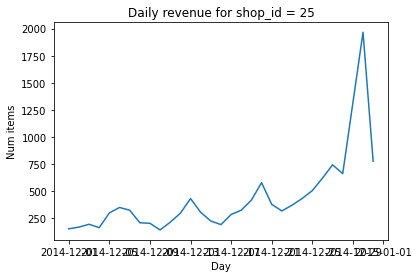

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [245]:
shop_id = 25

total_num_items_sold = sold_list# YOUR CODE GOES HERE
days = month_date# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = sigma# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [258]:
STUDENT_EMAIL = 'gibson870811@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'tjDVKwSjroFxm8To'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [259]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)